# Cuaderno: Entendiendo el Gradiente Descendiente

**Objetivo:** Comprender la intuición, las matemáticas y la implementación del Gradiente Descendiente (GD), el algoritmo de optimización fundamental en Machine Learning.

In [43]:
# Celda de configuración: Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# Configuraciones para gráficos más bonitos
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## Implementación: Batch Gradient Descent (GD Básico)

Vamos a implementar GD "desde cero" (from scratch). Usaremos **Batch Gradient Descent**, lo que significa que calculamos el gradiente usando **todo el conjunto de datos** en cada iteración.

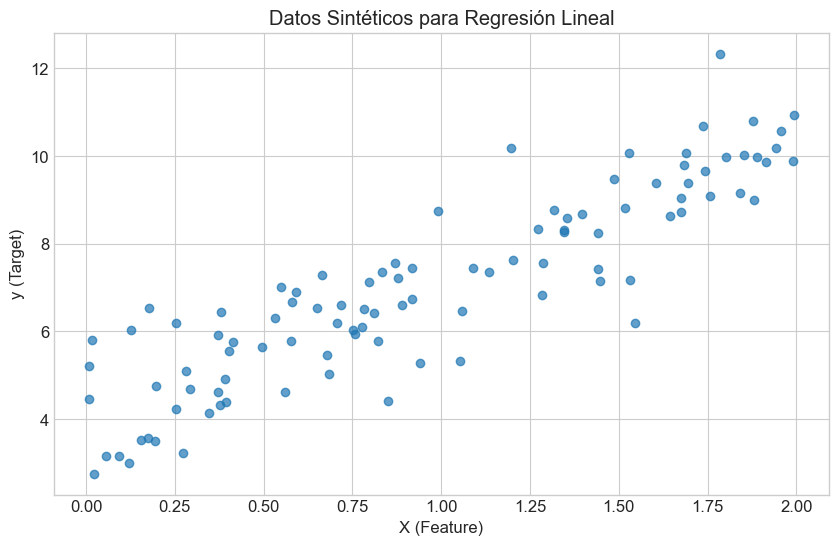

In [44]:
# 1. Generar datos de ejemplo
# Generamos datos que siguen la línea y = 4 + 3x + ruido
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 2. Visualizar los datos
plt.scatter(X, y, alpha=0.7)
plt.xlabel('X (Feature)')
plt.ylabel('y (Target)')
plt.title('Datos Sintéticos para Regresión Lineal')
plt.show()

In [45]:
# Preparar los datos para la implementación
# Agregamos el término de intercepto (x0 = 1) a cada instancia
# Esto nos permite tratar a theta_0 (bias) y theta_1 (peso) de la misma manera
X_b = np.c_[np.ones((100, 1)), X]  # np.c_ concatena columnas

print("Forma de X original:", X.shape)
print("Forma de X_b (con bias):", X_b.shape)

Forma de X original: (100, 1)
Forma de X_b (con bias): (100, 2)


In [46]:
# 4. Implementar el algoritmo de Gradiente Descendiente

# Hiperparámetros
learning_rate = 0.05  # Tasa de aprendizaje (alpha)
n_iterations = 100   # Número de épocas
m = 100               # Número de muestras (tamaño del batch)

# Inicialización de parámetros (theta_0 y theta_1)
# Se inicializan aleatoriamente
theta = np.random.randn(2, 1) 

# Historial para visualización
cost_history = []
theta_history = []

print(f"Theta inicial (aleatorio): {theta.ravel()}")

# Bucle de entrenamiento
for iteration in range(n_iterations):
    # 1. Calcular predicciones (h_theta(x))
    # Esto es X_b.dot(theta) para todas las muestras a la vez (vectorizado)
    predictions = X_b.dot(theta)
    
    # 2. Calcular el error
    errors = predictions - y
    
    # 3. Calcular los gradientes (derivadas parciales)
    # Fórmula: (1/m) * X_b^T . (error)
    gradients = (1/m) * X_b.T.dot(errors)
    
    # 4. Actualizar los parámetros (dar el paso)
    theta = theta - (learning_rate * gradients)
    
    # 5. Calcular y guardar el costo (MSE) para esta iteración
    # (1 / 2m) * sum(error^2)
    cost = (1/(2*m)) * np.sum(errors**2)
    cost_history.append(cost)
    theta_history.append(theta.ravel())

# Resultados finales
print(f"\nTheta final (entrenado): {theta.ravel()}")
print(f"Costo final (MSE): {cost_history[-1]}")

Theta inicial (aleatorio): [0.65295398 0.44046731]

Theta final (entrenado): [3.69992339 3.39208498]
Costo final (MSE): 0.48235433705940384


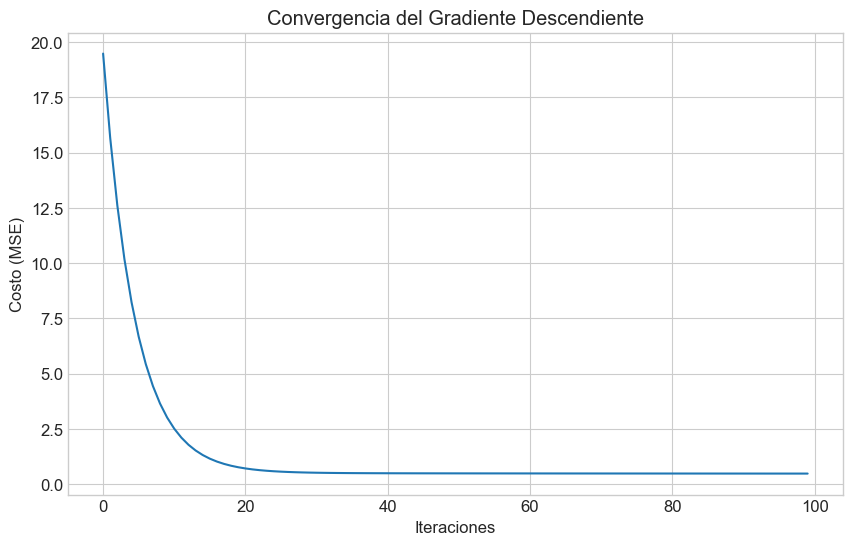

In [47]:
# Graficar la convergencia de la Función de Costo
plt.plot(range(n_iterations), cost_history)
plt.xlabel('Iteraciones')
plt.ylabel('Costo (MSE)')
plt.title('Convergencia del Gradiente Descendiente')
plt.show()

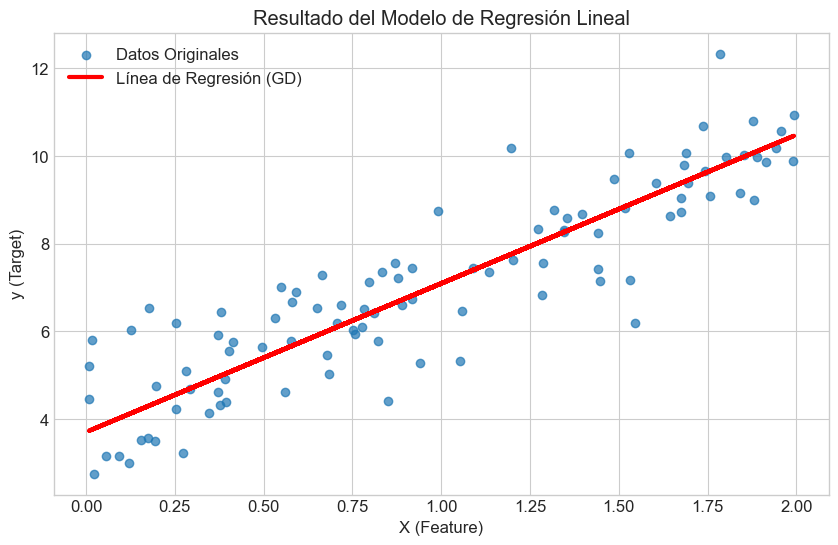

In [48]:
# Graficar la línea de regresión final
plt.scatter(X, y, alpha=0.7, label='Datos Originales')
plt.plot(X, X_b.dot(theta), color='red', linewidth=3, label='Línea de Regresión (GD)')
plt.xlabel('X (Feature)')
plt.ylabel('y (Target)')
plt.legend()
plt.title('Resultado del Modelo de Regresión Lineal')
plt.show()

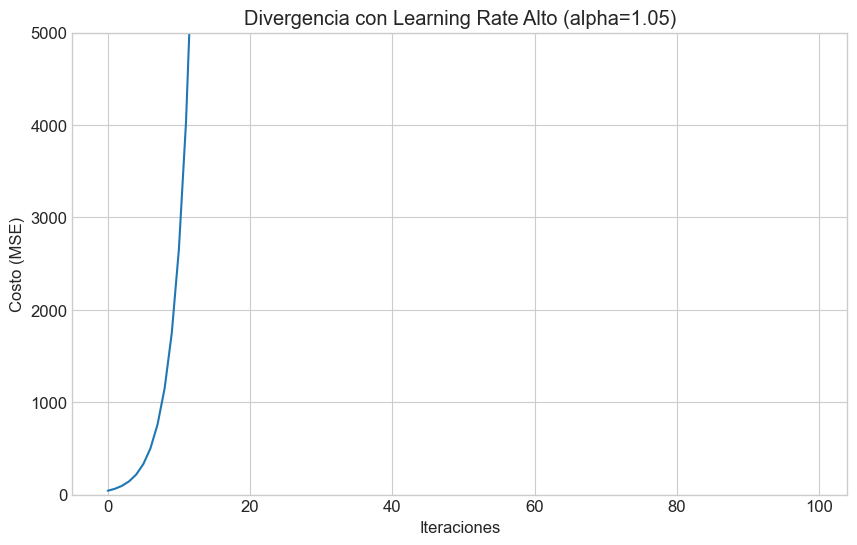

: 

In [ ]:
# Experimento: ¿Qué pasa si alpha es muy grande?
learning_rate_alto = 1.05 
theta_alto = np.random.randn(2, 1)
cost_history_alto = []

for iteration in range(100): # Menos iteraciones para ver la explosión
    gradients = (1/m) * X_b.T.dot(X_b.dot(theta_alto) - y)
    theta_alto = theta_alto - learning_rate_alto * gradients
    cost = (1/(2*m)) * np.sum((X_b.dot(theta_alto) - y)**2)
    cost_history_alto.append(cost)

# Graficar la divergencia
plt.plot(range(100), cost_history_alto)
plt.xlabel('Iteraciones')
plt.ylabel('Costo (MSE)')
plt.title('Divergencia con Learning Rate Alto (alpha=1.05)')
plt.ylim(0, 5000) # Limitar el eje Y para ver el inicio de la explosión
plt.show()

## Recursos Adicionales para Visualizar

La mejor forma de entender GD es viéndolo en acción.

1.  **Visualización de Optimizadores (Distill.pub):**
    * [https://distill.pub/2017/momentum/](https://distill.pub/2017/momentum/)
    * *Descripción:* Un artículo (en inglés) más avanzado que muestra visualmente cómo GD se compara con optimizadores más complejos (como Momentum, Adam, RMSProp) en paisajes de costo difíciles.

2.  **TensorFlow Playground:**
    * [https://playground.tensorflow.org/](https://playground.tensorflow.org/)
    * *Descripción:* Entrena una red neuronal simple en tu navegador. Puedes elegir el *learning rate* y ver cómo afecta la convergencia en tiempo real.

3. **Visualización 3D de Gradient Descent**
    * [https://www.desmos.com/3d/dhuahczrzv](https://www.desmos.com/3d/dhuahczrzv)
    * *Descripción:* Visuazliación 3D del algoritmo de gradiente descendente.